In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [40]:
# Convert date columns
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [41]:
customers.head()       # Displays the first five rows

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [42]:
customers.info()       # Provides data type and null value info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [43]:
customers.shape        # Returns the number of rows and columns


(200, 4)

In [44]:
customers.columns      # List of column names

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')

In [45]:
customers.isnull().sum()   # Counts missing values per column

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [46]:
customers.duplicated().sum()  # Check for duplicate rows


0

In [47]:
products.head()       # Displays the first few rows

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [48]:
products.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [49]:
products.shape        # Returns the number of rows and columns

(100, 4)

In [50]:
products.columns      # List of column names

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [51]:
products.isnull().sum()   # Counts missing values per column

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [52]:
products.duplicated().sum()  # Check for duplicate rows

0

In [53]:
transactions.head()       # Displays the first few rows

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [54]:
transactions.info()       # Provides data type and null value info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [55]:
transactions.shape        # Returns the number of rows and columns

(1000, 7)

In [56]:
transactions.columns      # List of column names

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [57]:
transactions.isnull().sum()   # Counts missing values per column

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [58]:
transactions.duplicated().sum()  # Check for duplicate rows

0

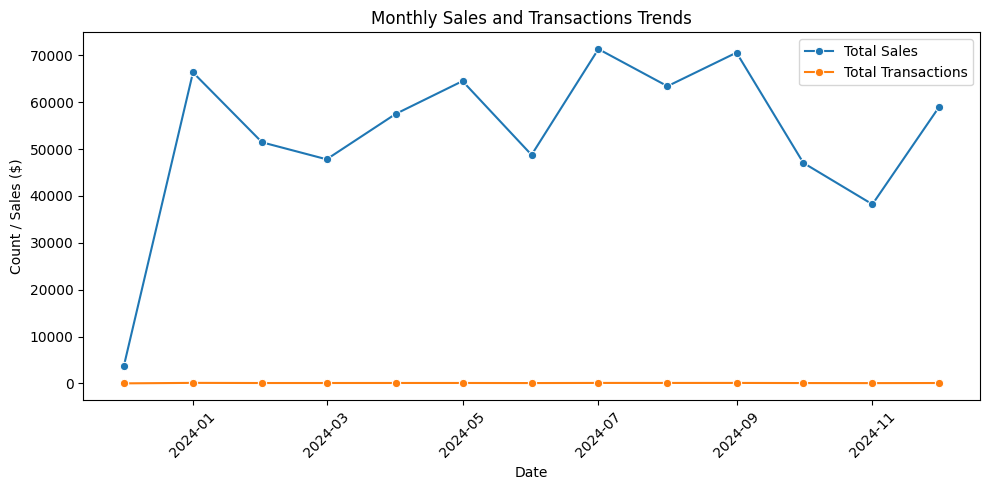

In [59]:

# 1. Monthly Sales and Transactions Trends
sales_trend = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).agg(
    total_sales=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count')
).reset_index()
sales_trend['TransactionDate'] = sales_trend['TransactionDate'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_trend, x='TransactionDate', y='total_sales', marker='o', label="Total Sales")
sns.lineplot(data=sales_trend, x='TransactionDate', y='total_transactions', marker='o', label="Total Transactions")
plt.title("Monthly Sales and Transactions Trends")
plt.xlabel("Date")
plt.ylabel("Count / Sales ($)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

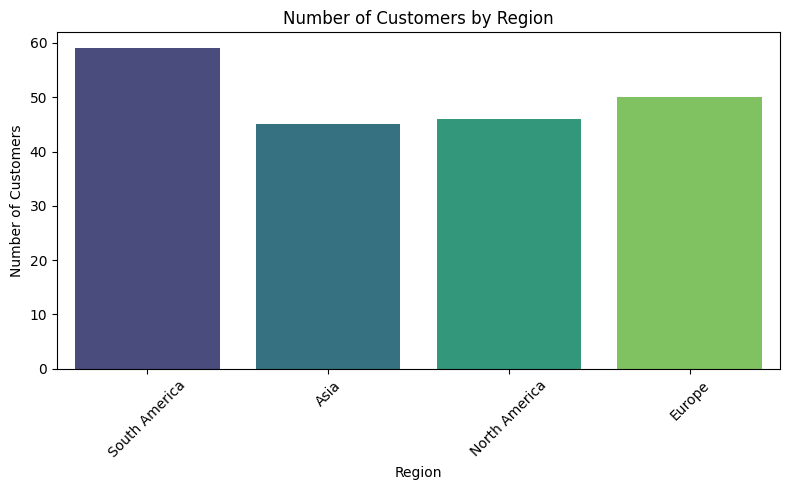

In [63]:

# 2. Customer Distribution by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette="viridis", hue='Region', dodge=False, legend=False)
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


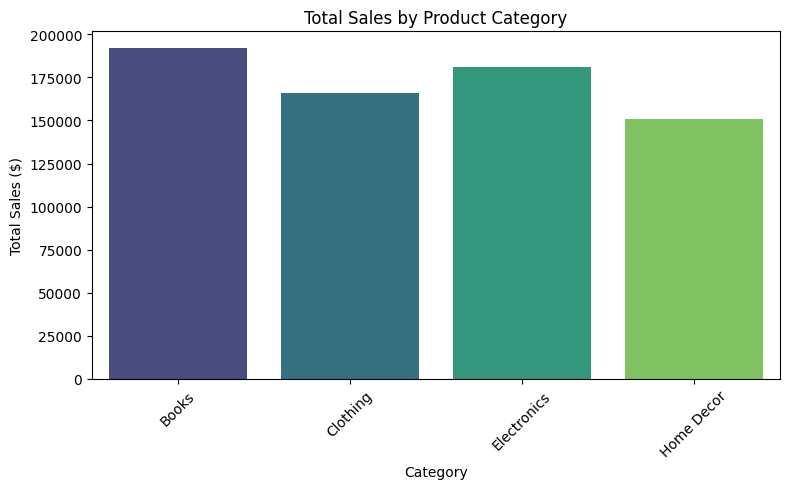

In [67]:
# 3. Total Sales by Product Category
product_sales = transactions.merge(products, on='ProductID', how='left')
category_sales = product_sales.groupby('Category').agg(total_sales=('TotalValue', 'sum')).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Category', y='total_sales', palette="viridis",hue='Category', dodge=False, legend=False)
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

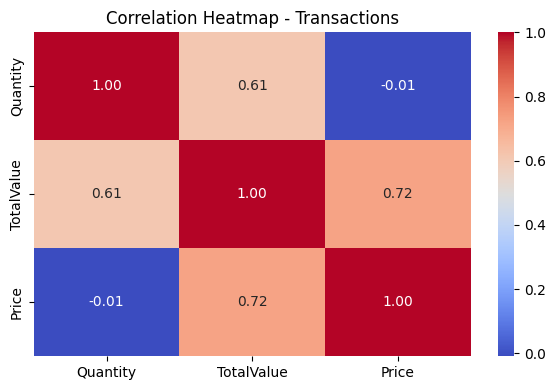

In [68]:

# 4. Correlation Analysis
plt.figure(figsize=(6, 4))
sns.heatmap(transactions[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Transactions")
plt.tight_layout()
plt.show()
